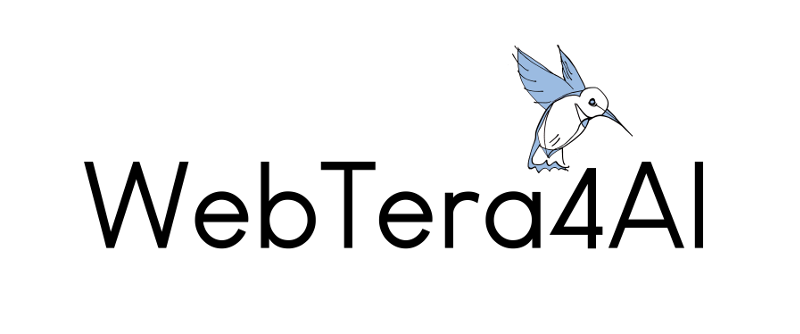

# Título:  Lectura Archivos No Estructurados: Word docx. Extracción TABLAS. Biblioteca docx

##### Referencia: docxTema4_ExtraccionTABLAS_docx_20230715.ipynb


##### <a id="top"></a>
---
<font size='5' color='#296eaa'><h2>Contenido</h2></font> 

- [📚 Tema 1 ¿Cómo leer un archivo NoEstructurado Word docx con Python? 🧠](#Tema1)  

    - [🧠 Tema 1.1 Importar las bibliotecas:  docx2python 🏛](#Tema1.1)

    - [💻 Tema 1.2 Obtener una estructura Python con docx2python 💻](#Tema1.2)



--------------

Tema 4 Tipo NoEstructurado Word docx. Extracción Tablas. Biblioteca docx
    4.1.- Lectura de archivo NoEstructurado docx y generación estructura python
    4.2.- Iteración en cada estructura del cuerpo para extracción de Tablas
    4.3.- Almacenamiento de resultados en sistema archivos: XLSX y bitacoras del procesamiento en diferentes formatos: csv, xlsx, json 


<div style="float: center; width: 80%;">
<font id='Tema1' size='3' color='#296eaa'>
    <h1>🚀 Tema 1 ¿Cómo leer un archivo NoEstructurado Word docx con Python?  🤔</h1>
</font>
</div>

<div style="float: right;">
<a href="#top" class="btn btn-primary btn-sm" role="button" 
   aria-pressed="true" style="color:white" data-toggle="popover" title="go to Top">Inicio</a>
</div>
<div style="float: right;">
<a href="#final" class="btn btn-primary btn-sm" role="button" 
   aria-pressed="true" style="color:white" data-toggle="popover" title="go to Top">Final</a>
</div>

<div style="float: center; width: 80%;">
<font id='Tema1.1' size='3' color='#296eaa'>
    <h1>📚 Tema 1.1 Importar las bibliotecas, en particular docx2python 📚</h1>
</font>
</div>

<div style="float: right;">
<a href="#top" class="btn btn-primary btn-sm" role="button" 
   aria-pressed="true" style="color:white" data-toggle="popover" title="go to Top">Inicio</a>
</div>
<div style="float: right;">
<a href="#final" class="btn btn-primary btn-sm" role="button" 
   aria-pressed="true" style="color:white" data-toggle="popover" title="go to Top">Final</a>
</div>

In [ ]:
import os
from os import listdir
import sys
import shutil
import datetime as dt
import time
import numpy as np
from numpy import savetxt
import pandas as pd
import matplotlib.pyplot as plt

import math
from math import sqrt
import glob

from collections import Counter
from collections import OrderedDict

import itertools

import re
import json
import string
import random
import csv

from tqdm import tqdm

import io
from io import StringIO
from io import BytesIO


from IPython.display import IFrame
from IPython.display import Image
from IPython.display import display, HTML

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import warnings
from string import punctuation

import hashlib

import unidecode


In [ ]:
import tarfile

from zipfile import ZipFile

import zlib, lzma, bz2

import zipfile36 as zipfile

# Opción 2: Biblioteca docx

In [ ]:
import docx

from docx import Document


In [ ]:
ggReporteSalida = {}


In [ ]:
ggEsDepuracion = True
ggEsDepuracionNivel1 = False
ggEsDepuracionNivel2 = False

if (ggEsDepuracion) :
    ggEsDepuracionNivel1 = False
    ggEsDepuracionNivel2 = False

if (ggEsDepuracionNivel1) :
    ggEsDepuracion = True
    ggEsDepuracionNivel2 = False

if (ggEsDepuracionNivel2) :
    ggEsDepuracion = True
    ggEsDepuracionNivel1 = True
    

In [ ]:
FechaActualInicio = dt.datetime.now().strftime('%Y/%m/%d %H:%M:%S')
FechaActualInicioEpoch = int(time.time())

ggReporteSalida['FechaActualInicio'] = FechaActualInicio
ggReporteSalida['FechaActualInicioEpoch'] = FechaActualInicioEpoch

if (ggEsDepuracion):
    print (f"La fecha InicioEpoch:  {str(FechaActualInicioEpoch)}" )
    print (f"La fecha y hora actual:  {str(FechaActualInicio)}" )



In [ ]:
!python -VV

In [ ]:
ggDirectorioLocalCentOS = '/home/saxsa/Documentos'
ggDirectorioLocalUbuntu = '/home/saxsa/Documentos'
ggDirectorioLocalMac = '/Users/saxsa/Documents'

ggDirectorioLocal = ggDirectorioLocalUbuntu

ggReporteSalida['ggDirectorioLocal'] = ggDirectorioLocal


In [ ]:
ggDirectorioTrabajoActual = os.getcwd()
ggReporteSalida['ggDirectorioTrabajoActual'] = ggDirectorioTrabajoActual

if (ggEsDepuracion):
    print("Directorio Inicio Trabajo con Cuaderno Jupyter o \'CurrentWorkingDirectory\' " + ggDirectorioTrabajoActual )

# NombreProyecto

In [ ]:
ggNombreProyecto ='WebTera4AI_NoEstructuradosDOCX'

# Directorio Ubicación Datos

In [ ]:
ggDirectorioDATA = '/home/saxsa/Documentos/EjemplosDocx'


# Ubicación archivo datos

In [ ]:
ggBaseNombreArchivoEjemplo = 'docxEjemplo20'

ggExtensionArchivo = '.docx'

ggNombreArchivoEjemplo = ggBaseNombreArchivoEjemplo+ggExtensionArchivo

ggRutaArchivo = ggDirectorioDATA+os.sep+ggNombreArchivoEjemplo

if (ggEsDepuracion):
    print (f"RutaArchivo: {ggRutaArchivo} ")

# Directorio para almacenamiento de RESULTADOS

In [ ]:
ggDirectorioRESULTADOS=os.path.join(ggDirectorioLocal,'Salida_'+ggNombreProyecto, ggBaseNombreArchivoEjemplo)
ggReporteSalida['DirectorioRESULTADOS'] = ggDirectorioRESULTADOS

if not os.path.exists(ggDirectorioRESULTADOS):
    os.makedirs(ggDirectorioRESULTADOS)
    
if (ggEsDepuracion):
    print (f"DirectorioWebTera: {ggDirectorioRESULTADOS} ")

In [ ]:
ggDirectorioTABLASCSV=os.path.join(ggDirectorioRESULTADOS,ggBaseNombreArchivoEjemplo+'_TABLASCSV')
ggReporteSalida['DirectorioTABLASCSV'] = ggDirectorioTABLASCSV

if not os.path.exists(ggDirectorioTABLASCSV):
    os.makedirs(ggDirectorioTABLASCSV)
    
if (ggEsDepuracion):
    print (f"DirectorioTABLASCSV: {ggDirectorioTABLASCSV} ")
    
    

In [ ]:
ggDirectorioTABLASXLSX=os.path.join(ggDirectorioRESULTADOS,ggBaseNombreArchivoEjemplo+'_TABLASXLSX')
ggReporteSalida['DirectorioTABLASXLSX'] = ggDirectorioTABLASXLSX

if not os.path.exists(ggDirectorioTABLASXLSX):
    os.makedirs(ggDirectorioTABLASXLSX)
    
if (ggEsDepuracion):
    print (f"DirectorioTABLASXLSX: {ggDirectorioTABLASXLSX} ")
    

# Lectura archivo Word docx y almacenamiento en variable Python

In [ ]:
if (ggEsDepuracion):
    print(f"RutaArchivo: {ggRutaArchivo}")

# Metadatos archivo


# Extraccion de Tablas

In [ ]:
%%time

pd.set_option('display.max_colwidth', None)

MiDocumento = Document(ggRutaArchivo)

tablas = MiDocumento.tables

ggCtaTablas = 0

ggNumTotalTablas = len(tablas)


# Itera sobre cada tabla y sus filas y celdas
for tabla in tablas:
    datos_tabla = []
    ggCtaTablas += 1
    print(f"Tabla: {ggCtaTablas} de {ggNumTotalTablas} ")
    ggListaFilas = tabla.rows
    ggNumTotalFilas = len(ggListaFilas)
    print(f"Tabla: {ggCtaTablas} con {ggNumTotalFilas} Filas (rows)")
    ggCtaFilas = 0
    
    for fila in ggListaFilas:
        ggCtaFilas += 1
        if (ggEsDepuracionNivel2) :
            print(f"Fila: {ggCtaFilas} de {ggNumTotalFilas} ")
        ggListaCeldas = fila.cells
        ggNumTotalCeldas = len(ggListaCeldas)
        ggCtaCeldas = 0
        datos_fila = []
        for celda in ggListaCeldas:
            ggCtaCeldas += 1
            if (ggEsDepuracionNivel2) :
                print(f"Celda: {ggCtaCeldas} de {ggNumTotalCeldas}")
                print(f"{celda.text}\n")
                
            datos_fila.append(celda.text)
        if (ggEsDepuracionNivel2) :            
            print(f"\n")  # Imprime una línea en blanco después de cada fila
            print(f"{datos_fila}\n")
        datos_tabla.append(datos_fila)

    if (ggEsDepuracionNivel2) :
        print(f"{datos_tabla}\n")

    
    df = pd.DataFrame(datos_tabla)
    print(f"{display(df)}\n")
    
    # Ruta de salida del archivo Excel y CSV
    ruta_salidaXLSX = ggDirectorioTABLASXLSX+os.sep+ggBaseNombreArchivoEjemplo+ '_TABLA_'+str(ggCtaTablas)+'.xlsx'
    ruta_salidaCSV = ggDirectorioTABLASCSV+os.sep+ggBaseNombreArchivoEjemplo+ '_TABLA_'+str(ggCtaTablas)+'.csv'

 
    
    # Guardar el DataFrame en un archivo Excel
    df.to_excel(ruta_salidaXLSX, index=False, header=False)
    print(f'Tabla XLSX almacenada en: {ruta_salidaXLSX}')
    
    # Guardar el DataFrame en un archivo CSV
    df.to_csv(ruta_salidaCSV, index=False, header=False)
    print(f'Tabla CSV almacenada en: {ruta_salidaCSV}')
    
    print(f"\n")


In [ ]:
%%time

for dirname, _, filenames in os.walk(ggDirectorioTABLASCSV):
    print("\n","Directorio:",dirname, "\nArchivos:")
    for filename in filenames:
        print(filename)

In [ ]:
%%time

for dirname, _, filenames in os.walk(ggDirectorioTABLASXLSX):
    print("\n","Directorio:",dirname, "\nArchivos:")
    for filename in filenames:
        print(filename)

<code>

author
string – An entity primarily responsible for making the content of the resource.

category
string – A categorization of the content of this package. Example values might include: Resume, Letter, Financial Forecast, Proposal, or Technical Presentation.

comments
string – An account of the content of the resource.

content_status
string – completion status of the document, e.g. ‘draft’

created
datetime – time of intial creation of the document

identifier
string – An unambiguous reference to the resource within a given context, e.g. ISBN.

keywords
string – descriptive words or short phrases likely to be used as search terms for this document

language
string – language the document is written in

last_modified_by
string – name or other identifier (such as email address) of person who last modified the document

last_printed
datetime – time the document was last printed

modified
datetime – time the document was last modified

revision
int – number of this revision, incremented by Word each time the document is saved. Note however python-docx does not automatically increment the revision number when it saves a document.

subject
string – The topic of the content of the resource.

title
string – The name given to the resource.

version
string – free-form version string

</code>

In [ ]:


core_properties = MiDocumento.core_properties

ggAutor = core_properties.author

ggCategoria = core_properties.category

ggTitle = core_properties.title

ggCreated = core_properties.created

ggKeywords = core_properties.keywords


ggModified = core_properties.modified

ggLast_printed= core_properties.last_printed





if (ggEsDepuracion):
    print(f"tipo {type(core_properties)} ")

    print(f"ggAutor: {ggAutor} ")
    
    print(f"ggCategoria: {ggCategoria} ")
    
    print(f"ggCreated: {ggCreated} ")

    print(f"ggKeywords: {ggKeywords} ")
    
    print(f"ggModified: {ggModified} ")
    
    print(f"ggLast_printed: {ggLast_printed} ")
  
  
    
    

    print(f"ggTitle: {ggTitle} ")


In [ ]:
FechaFinal = dt.datetime.now().strftime('%Y/%m/%d %H:%M:%S')
FechaFinalEpoch = int(time.time())
TiempoTranscurrido = FechaFinalEpoch - FechaActualInicioEpoch

TiempoTranscurridoMin = TiempoTranscurrido / 60
TiempoTranscurridoHrs = TiempoTranscurridoMin / 60

if (ggEsDepuracion):
    print ("La fecha final  :  " + str(FechaFinal) ) 
    print ("La fecha inicial:  " + str(FechaActualInicio) )
    print ("El tiempo transcurrido en segundos:  " + str(TiempoTranscurrido) )
    print ("El tiempo transcurrido en Min:  " + str(TiempoTranscurridoMin) )
    print ("El tiempo transcurrido en Hrs:  " + str(TiempoTranscurridoHrs) )

<a id="final"></a>
<div style="float: center; width: 80%;">
<font id='FinEjecucion' size='3' color='#296eaa'>
    <h3>🚩 Fin ejecución 🤔</h3>
</font>
</div>

<div style="float: right;">
<a href="#top" class="btn btn-primary btn-sm" role="button" 
   aria-pressed="true" style="color:white" data-toggle="popover" title="go to Top">Inicio</a>
</div>
<div style="float: right;">
<a href="#final" class="btn btn-primary btn-sm" role="button" 
   aria-pressed="true" style="color:white" data-toggle="popover" title="go to Top">Final</a>
</div>

<div style="float: right;">
<a href="#top" class="btn btn-primary btn-sm" role="button" 
   aria-pressed="true" style="color:white" data-toggle="popover" title="go to Top">Inicio</a>
</div>
<div style="float: right;">
<a href="#final" class="btn btn-primary btn-sm" role="button" 
   aria-pressed="true" style="color:white" data-toggle="popover" title="go to Top">Final</a>
</div>